In [1]:

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:

# For Data Processing
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image, ImageEnhance

# For ML Models
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.losses import *
from tensorflow.keras.models import *
from tensorflow.keras.metrics import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.applications import *
from tensorflow.keras.preprocessing.image import load_img

# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Miscellaneous
from tqdm import tqdm
import os
import random

# Yes 2
from keras.preprocessing import image
from skimage.color import rgb2gray
from skimage import data
from skimage.filters import gaussian
from skimage.segmentation import active_contour
from skimage.metrics import mean_squared_error, peak_signal_noise_ratio
import cv2
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional

image -> PSNR After Gussian Filter: 2.3494 | MSR After Gussian Filter: 37856.7231


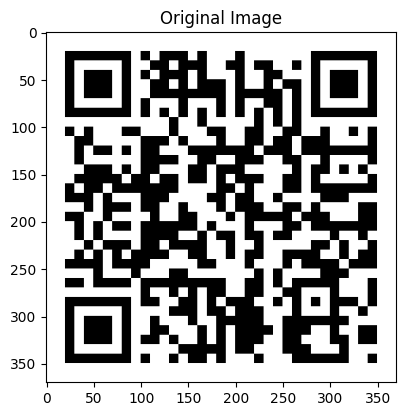

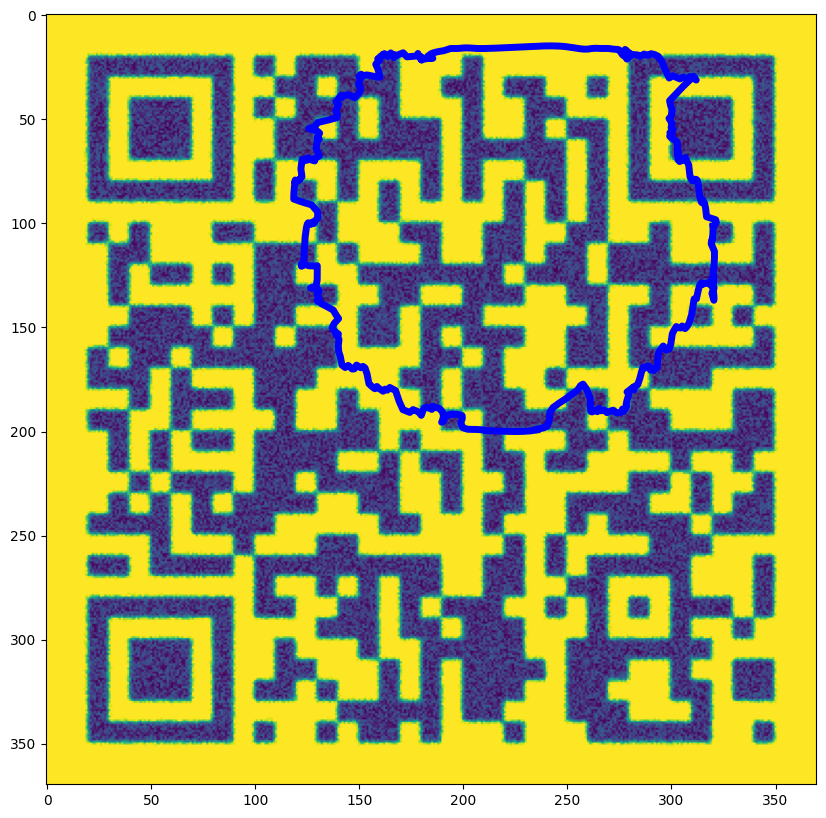

In [4]:
test = load_img(f"/content/drive/MyDrive/QR codes/benign/benign/benign_0.png",target_size = (128, 128))
image=cv2.imread(f"/content/drive/MyDrive/QR codes/benign/benign/benign_0.png")
image=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
def show_gray(img,title=""):
  """
  Function to show grayscale image
  """
  plt.imshow(img,cmap='gray')
  plt.title(title)
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
show_gray(image,"Original Image")
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage import data
from skimage.filters import gaussian
from skimage.segmentation import active_contour
image_noiseless = gaussian(image, 1)
print(f"image -> PSNR After Gussian Filter: {peak_signal_noise_ratio(image,image_noiseless,data_range=255):.4f} | MSR After Gussian Filter: {mean_squared_error(image,image_noiseless):.4f}")
# Snake Segmentation
# Localising the circle's center at 220, 110
x1 = 220 + 100*np.cos(np.linspace(0, 2*np.pi, 500))
x2 = 100 + 100*np.sin(np.linspace(0, 2*np.pi, 500))

# Generating a circle based on x1, x2
snake = np.array([x1, x2]).T

# Computing the Active Contour for the given image
astronaut_snake = active_contour(image,
                                 snake)
fig = plt.figure(figsize=(10, 10))

# Adding subplots to display the markers
ax = fig.add_subplot(111)

# Plotting  image
ax.imshow(image_noiseless)

# Plotting the face boundary marker
ax.plot(astronaut_snake[:, 0],
        astronaut_snake[:, 1],
        '-b', lw=5)
from skimage import data, img_as_float
from skimage.restoration import denoise_nl_means
new_image = image_noiseless
noisy = new_image + 0.3 * np.random.random(new_image.shape)
noisy = np.clip(noisy, 0, 1)
plt.imshow(noisy)


"\ntest_paths = []\ntest_labels = []\n\nfor label in os.listdir(test_dir):\n    for image in os.listdir(test_dir+label):\n        test_paths.append(test_dir+label+'/'+image)\n        test_labels.append(label)\n\ntest_paths, test_labels = shuffle(test_paths, test_labels)\n\nplt.figure(figsize=(14,6))\ncolors = ['#4285f4', '#ea4335', '#fbbc05', '#34a853']\nplt.rcParams.update({'font.size': 14})\nplt.pie([len(train_labels), len(test_labels)],\n        labels=['Train','Test'],\n        colors=colors, autopct='%.1f%%', explode=(0.05,0),\n        startangle=30)\nprint(test_labels)\n"

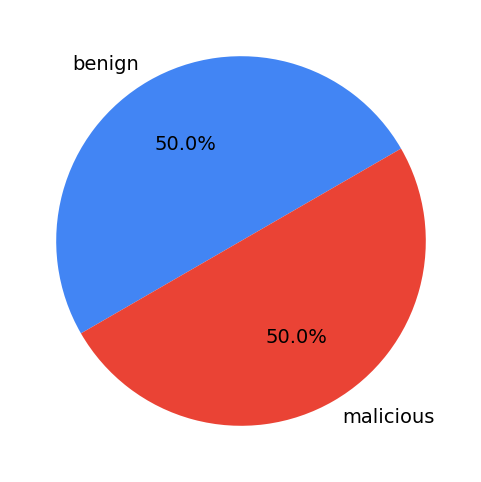

In [16]:
train_dir = '/content/drive/MyDrive/QR codes/'
#test_dir = '/content/drive/MyDrive/val/'

train_paths = []
train_labels = []

for label in os.listdir(train_dir):
    for image in os.listdir(train_dir+label):
        train_paths.append(train_dir+label+'/'+image)
        train_labels.append(label)

train_paths, train_labels = shuffle(train_paths, train_labels)

plt.figure(figsize=(14,6))
colors = ['#4285f4', '#ea4335', '#fbbc05', '#34a853']
plt.rcParams.update({'font.size': 14})
plt.pie([len([x for x in train_labels if x=='benign']),
         len([x for x in train_labels if x=='malicious'])],
        labels=['benign','malicious'],
        colors=colors, autopct='%.1f%%',
        startangle=30);


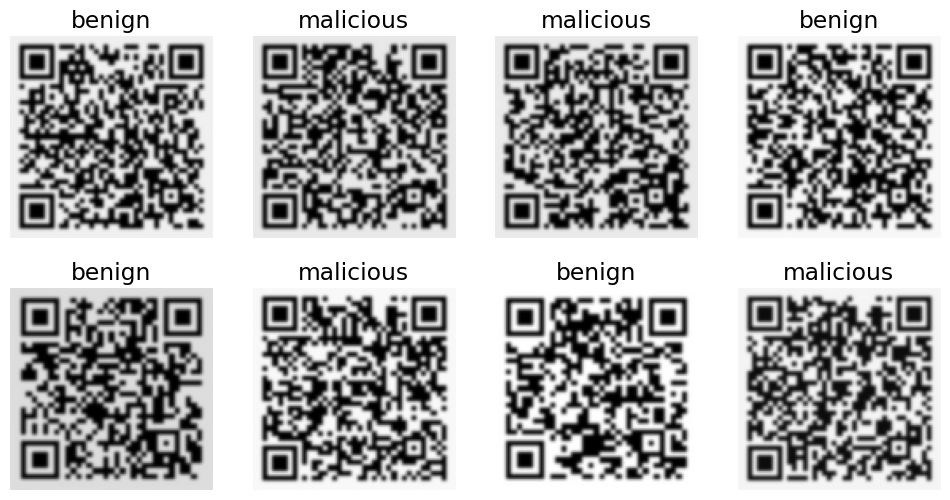

['benign',
 'benign',
 'malicious',
 'malicious',
 'malicious',
 'benign',
 'benign',
 'malicious',
 'benign',
 'malicious']

In [17]:
from skimage.filters import gaussian
from skimage.segmentation import active_contour

def augment_image(image):

    image = Image.fromarray(np.uint8(image))
    image = ImageEnhance.Brightness(image).enhance(random.uniform(0.8,1.2))
    image = ImageEnhance.Contrast(image).enhance(random.uniform(0.8,1.2))

    image = np.array(image)/255.0
    image = gaussian(image, 1)
    return image

IMAGE_SIZE = 128

def open_images(paths):
    '''
    Given a list of paths to images, this function returns the images as arrays (after augmenting them)
    '''
    images = []
    for path in paths:
        image = load_img(path, target_size=(IMAGE_SIZE,IMAGE_SIZE))
        image = augment_image(image)
        images.append(image)
    return np.array(images)

images = open_images(train_paths[50:59])
labels = train_labels[50:59]
fig = plt.figure(figsize=(12, 6))
for x in range(1, 9):
    fig.add_subplot(2, 4, x)
    plt.axis('off')
    plt.title(labels[x])
    plt.imshow(images[x])
plt.rcParams.update({'font.size': 12})
plt.show()

unique_labels = os.listdir(train_dir)

def encode_label(labels):
    encoded = []
    for x in labels:
        encoded.append(unique_labels.index(x))
    return np.array(encoded)

def decode_label(labels):
    decoded = []
    for x in labels:
        decoded.append(unique_labels[x])
    return np.array(decoded)

def datagen(paths, labels, batch_size=12, epochs=1):
    for _ in range(epochs):
        for x in range(0, len(paths), batch_size):
            batch_paths = paths[x:x+batch_size]
            batch_images = open_images(batch_paths)
            batch_labels = labels[x:x+batch_size]
            batch_labels = encode_label(batch_labels)
            yield batch_images, batch_labels

len(train_paths)
train_paths[:10]

len(train_labels)
train_labels[:10]



In [18]:
from tensorflow.keras.layers import LSTM, Bidirectional, GlobalAveragePooling2D

# Assuming you have already defined the necessary variables like IMAGE_SIZE, unique_labels, etc.

base_model = VGG16(input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3), include_top=False, weights='imagenet')
# Set all layers to non-trainable
for layer in base_model.layers:
    layer.trainable = False
# Set the last VGG block to trainable
base_model.layers[-2].trainable = True
base_model.layers[-3].trainable = True
base_model.layers[-4].trainable = True

model = Sequential()
model.add(Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
model.add(base_model)
# Apply GlobalAveragePooling2D to reduce the dimensions and convert it to 2D tensor
model.add(GlobalAveragePooling2D())

# Reshape the output to fit the LSTM input
model.add(Reshape((1, -1)))  # Reshaping the 2D tensor to 3D tensor (1 timestep for LSTM)

model.add(Bidirectional(LSTM(64, return_sequences=False)))  # 64 is the LSTM units, change it based on your requirements

model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(len(unique_labels), activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy'])

model.summary()


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 4, 4, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 1, 512)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 128)                 │         295,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,026,882 (57.32 MB)

 Trainable params: 7,391,618 (28.20 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

Epoch 1/4
200/200 ━━━━━━━━━━━━━━━━━━━━ 1272s 6s/step - loss: 0.5369 - sparse_categorical_accuracy: 0.6882
Epoch 2/4
200/200 ━━━━━━━━━━━━━━━━━━━━ 1070s 5s/step - loss: 0.1690 - sparse_categorical_accuracy: 0.9459
Epoch 3/4
200/200 ━━━━━━━━━━━━━━━━━━━━ 1063s 5s/step - loss: 0.0763 - sparse_categorical_accuracy: 0.9742
Epoch 4/4
200/200 ━━━━━━━━━━━━━━━━━━━━ 1062s 5s/step - loss: 0.0619 - sparse_categorical_accuracy: 0.9791


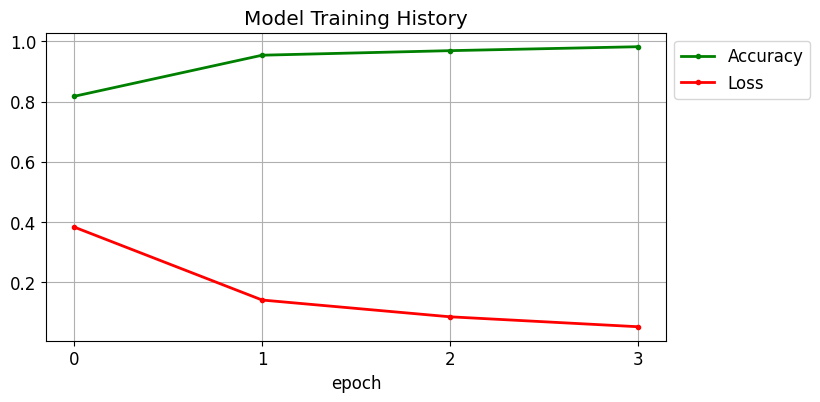

In [19]:
import tensorflow as tf
model_img_file = 'model.png'
tf.keras.utils.plot_model(model, to_file=model_img_file,
                          show_shapes=True,
                          show_layer_activations=True,
                          show_dtype=True,
                          show_layer_names=True )

batch_size = 20
steps = int(len(train_paths)/batch_size)
epochs = 4
history = model.fit(datagen(train_paths, train_labels, batch_size=batch_size, epochs=epochs),
                    epochs=epochs, steps_per_epoch=steps)

plt.figure(figsize=(8,4))
plt.grid(True)
plt.plot(history.history['sparse_categorical_accuracy'], '.g-', linewidth=2)
plt.plot(history.history['loss'], '.r-', linewidth=2)
plt.title('Model Training History')
plt.xlabel('epoch')
plt.xticks([x for x in range(epochs)])
plt.legend(['Accuracy', 'Loss'], loc='upper left', bbox_to_anchor=(1, 1))
plt.show()
